In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
haxby_db = niidb.FMriActivationsDb('data/haxby_mc_zrest_recategorized.db')

In [6]:
dtfa = DTFA.DeepTFA([b for b in haxby_db.all() if 'rest' not in b.task], mask='/home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz', num_factors=100, embedding_dim=2)

02/04/2020 14:53:46 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run01_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/04/2020 14:53:47 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run02_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/04/2020 14:53:48 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run03_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/04/2020 14:53:48 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run04_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/04/2020 14:53:49 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run05_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Fina

In [7]:
dtfa.num_voxels

32233

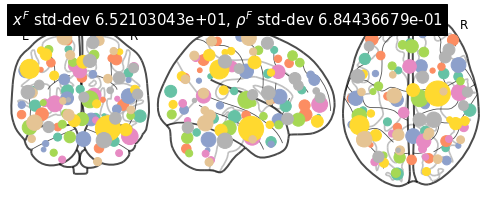

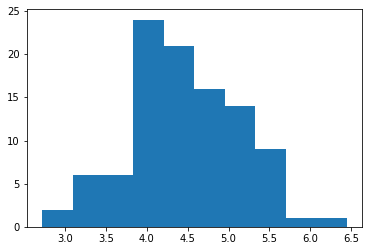

(<nilearn.plotting.displays.OrthoProjector at 0x7fd37d0c8990>,
 tensor([[-4.9350e+01, -2.7171e+01,  1.5875e+01],
         [ 3.7420e+01, -6.6643e+01, -2.7703e+01],
         [ 5.0733e+01,  8.4413e+00,  3.4163e+01],
         [ 2.5143e+01,  6.1594e+01, -1.0685e+01],
         [-4.2365e-01, -5.2272e+01,  3.1377e+01],
         [-4.7488e+01,  2.7022e+01, -5.7774e-02],
         [-2.3720e+01, -3.9165e+01, -3.3161e+01],
         [-1.2358e+01,  1.4944e+01,  5.9106e+01],
         [ 6.2916e+01, -2.6853e+01, -1.1104e+01],
         [ 1.6127e+01, -4.8646e+01, -1.3078e+01],
         [ 2.3482e-02,  4.3958e+01,  1.7140e+01],
         [-1.3354e+01, -9.3955e+01,  1.5595e+01],
         [ 3.5502e+01,  1.1625e+01, -3.7470e+01],
         [-2.3549e+01, -1.2185e+01, -2.2620e+01],
         [ 3.8066e+01, -5.9402e+01,  4.8499e+01],
         [-4.1366e+01, -6.3354e+01,  3.7747e+01],
         [ 4.5225e+01,  4.6892e+01,  7.5398e-01],
         [ 2.3772e+01,  1.4762e+01,  6.1233e+00],
         [ 1.9810e+01, -7.7531e+01, -

In [8]:
dtfa.visualize_factor_embedding()

In [9]:
dtfa.num_blocks

1173

In [10]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-2}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=100,
                    blocks_filter=haxby_db.inference_filter(training=True))

02/04/2020 14:55:26 [Epoch 1] (14352ms) Posterior free-energy 3.89103584e+08 = KL from prior 5.44699250e+05 - log-likelihood -3.88559040e+08
02/04/2020 14:55:26 Saving checkpoint...
02/04/2020 14:55:41 [Epoch 2] (14111ms) Posterior free-energy 3.64666720e+08 = KL from prior 3.15368781e+05 - log-likelihood -3.64351392e+08
02/04/2020 14:55:55 [Epoch 3] (14086ms) Posterior free-energy 3.52743520e+08 = KL from prior 3.04332375e+05 - log-likelihood -3.52439072e+08
02/04/2020 14:56:09 [Epoch 4] (14347ms) Posterior free-energy 3.46108672e+08 = KL from prior 2.69880000e+05 - log-likelihood -3.45838752e+08
02/04/2020 14:56:23 [Epoch 5] (14168ms) Posterior free-energy 3.42258560e+08 = KL from prior 1.87783547e+05 - log-likelihood -3.42070848e+08
02/04/2020 14:56:37 [Epoch 6] (13652ms) Posterior free-energy 3.39429312e+08 = KL from prior 1.30808750e+05 - log-likelihood -3.39298592e+08
02/04/2020 14:56:50 [Epoch 7] (13598ms) Posterior free-energy 3.37759328e+08 = KL from prior 1.05247195e+05 - log

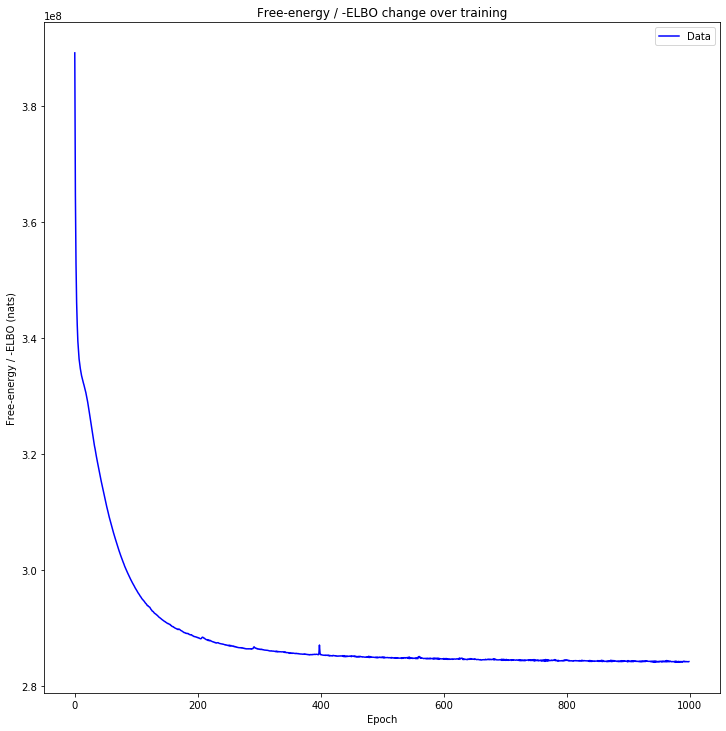

In [11]:
utils.plot_losses(losses)

In [12]:
def task_labeler(task):
    
    return task


def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:149: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


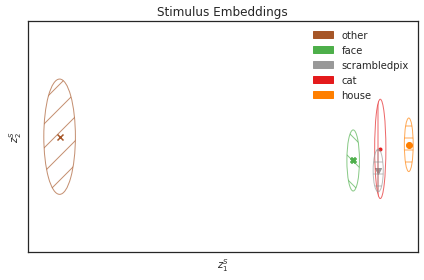

In [13]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Set1',
                            filename='haxby_norest_task_embedding.pdf')

In [14]:
def subject_labeler(subject):
    return 'Subject %d' % subject

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:149: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


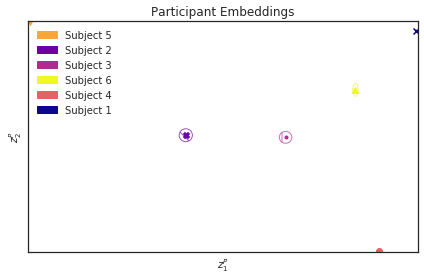

In [15]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')

In [16]:
def block_task_labeler(b):
    task = b.task
    return task


02/04/2020 18:34:52 Plotting factors for Participant 4, run 4


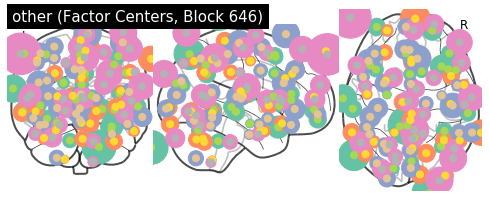

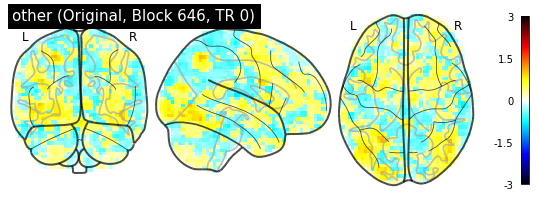

02/04/2020 18:34:55 Reconstruction Error (Frobenius Norm): 1.28526398e+02 out of 4.04504608e+02


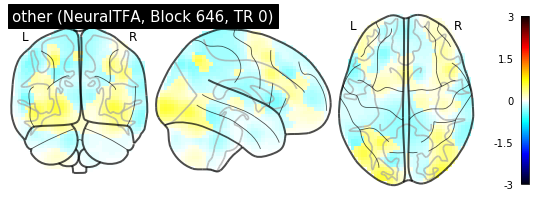

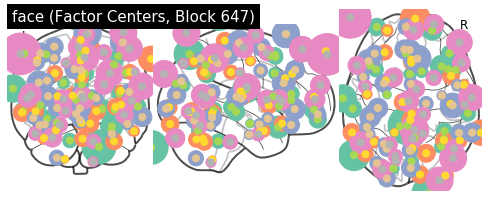

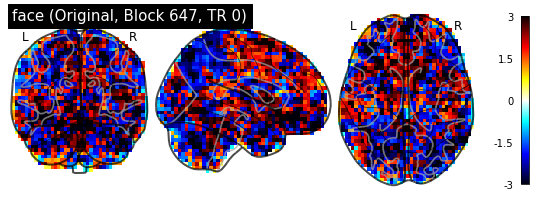

02/04/2020 18:34:58 Reconstruction Error (Frobenius Norm): 1.16008392e+02 out of 5.32930603e+02


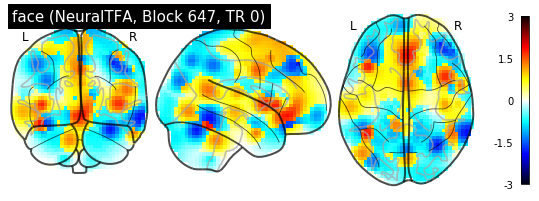

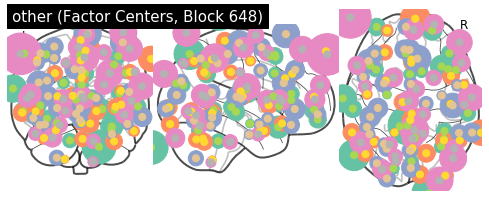

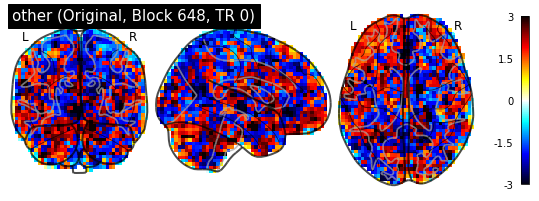

02/04/2020 18:35:02 Reconstruction Error (Frobenius Norm): 1.35377365e+02 out of 3.36906891e+02


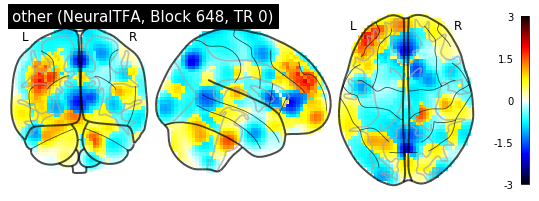

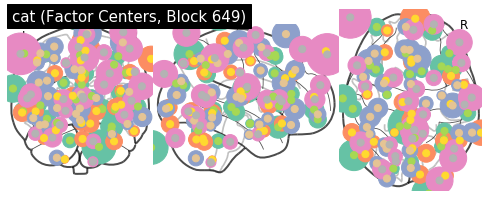

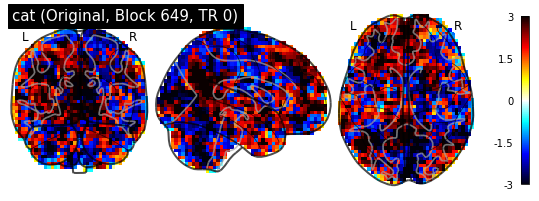

02/04/2020 18:35:05 Reconstruction Error (Frobenius Norm): 1.41011230e+02 out of 5.37576050e+02


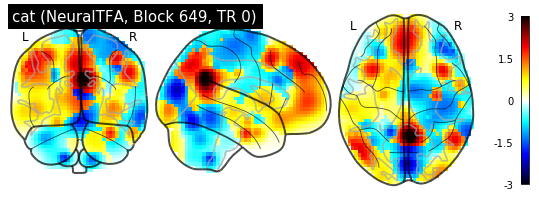

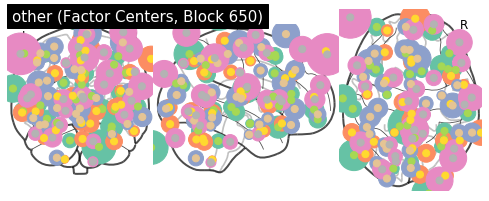

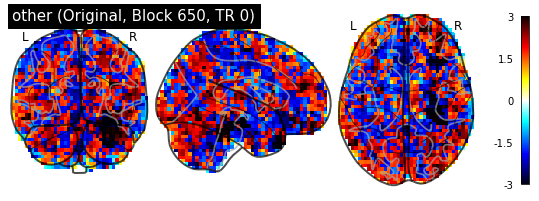

02/04/2020 18:35:08 Reconstruction Error (Frobenius Norm): 1.07788391e+02 out of 3.35760223e+02


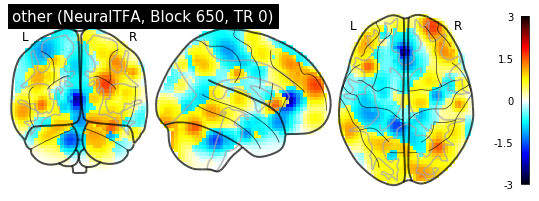

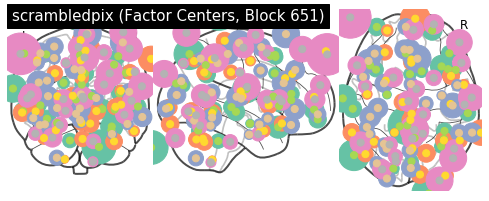

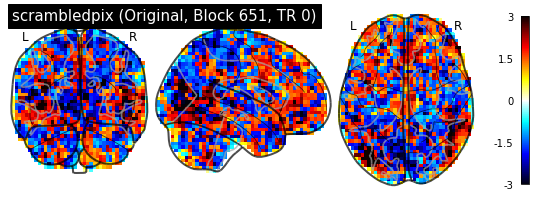

02/04/2020 18:35:12 Reconstruction Error (Frobenius Norm): 1.07446754e+02 out of 5.08389282e+02


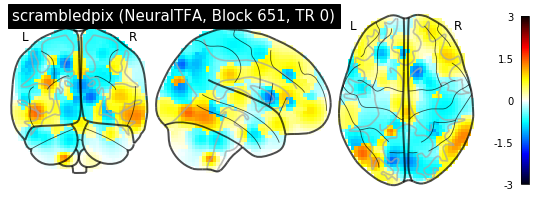

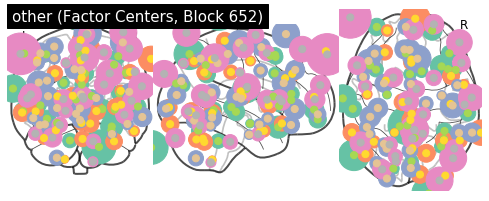

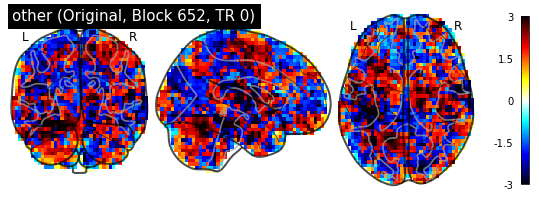

02/04/2020 18:35:15 Reconstruction Error (Frobenius Norm): 1.15218857e+02 out of 3.14717865e+02


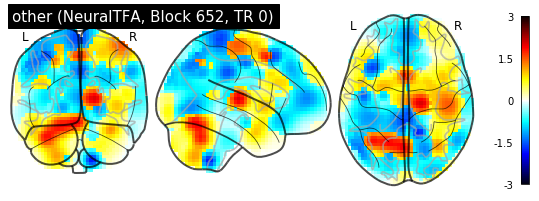

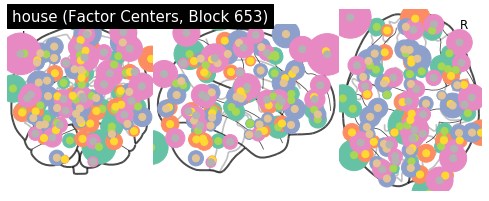

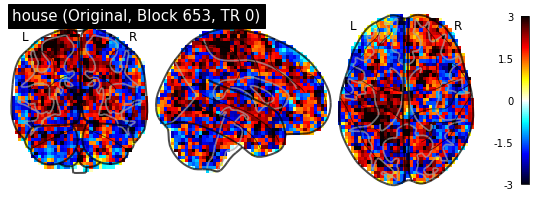

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/nilearn/plotting/displays.py:767: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))
02/04/2020 18:35:18 Reconstruction Error (Frobenius Norm): 1.10849335e+02 out of 5.28322876e+02


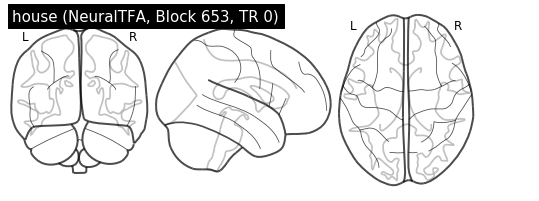

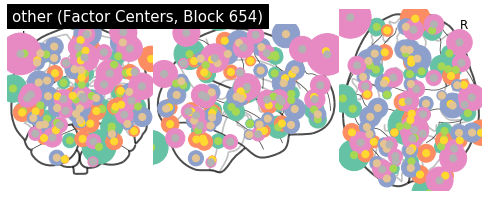

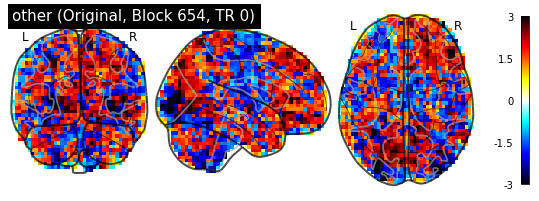

02/04/2020 18:35:21 Reconstruction Error (Frobenius Norm): 1.01594131e+02 out of 3.54053040e+02


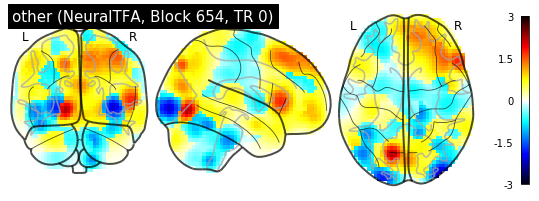

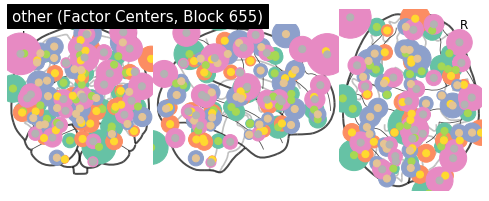

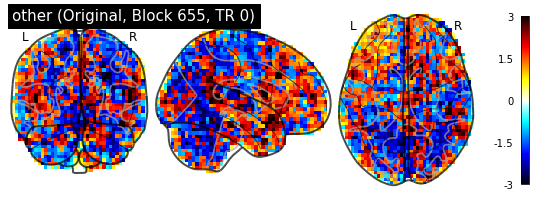

02/04/2020 18:35:24 Reconstruction Error (Frobenius Norm): 1.05810577e+02 out of 5.08117310e+02


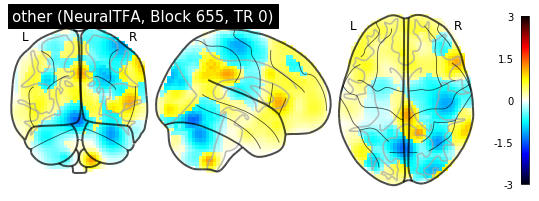

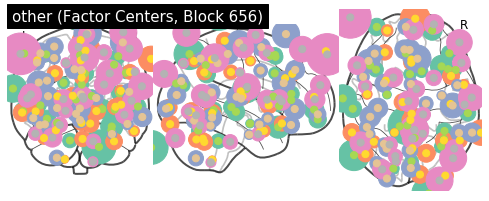

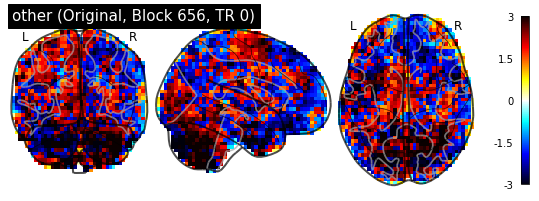

02/04/2020 18:35:27 Reconstruction Error (Frobenius Norm): 1.33756729e+02 out of 3.51168396e+02


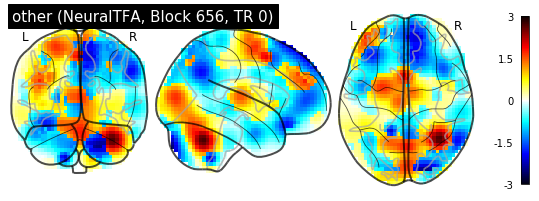

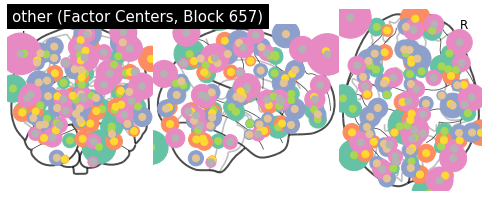

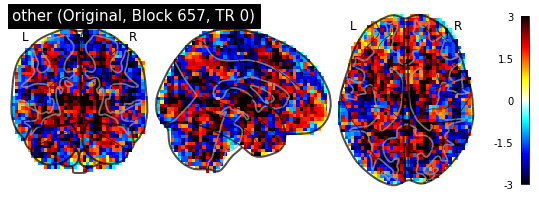

02/04/2020 18:35:31 Reconstruction Error (Frobenius Norm): 1.08717522e+02 out of 5.19239624e+02


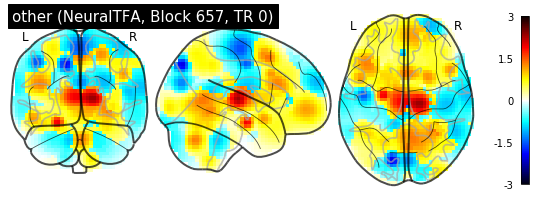

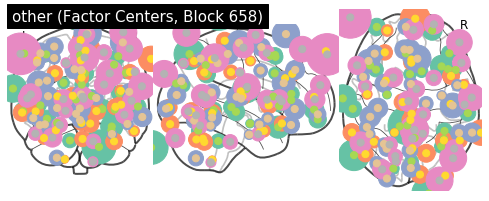

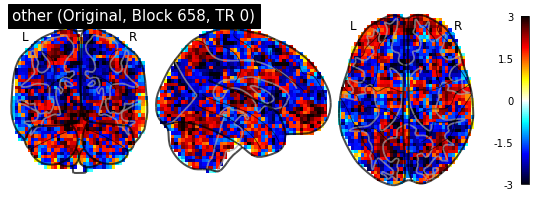

02/04/2020 18:35:34 Reconstruction Error (Frobenius Norm): 1.24210815e+02 out of 3.02454987e+02


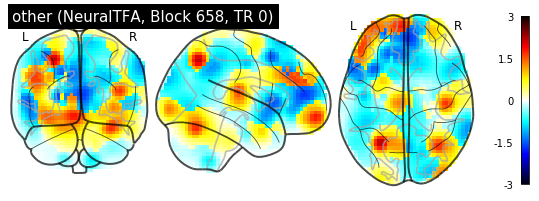

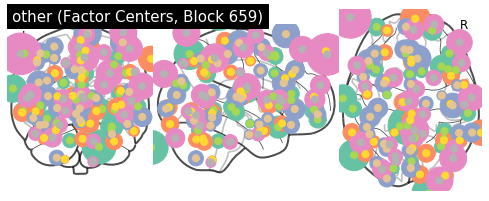

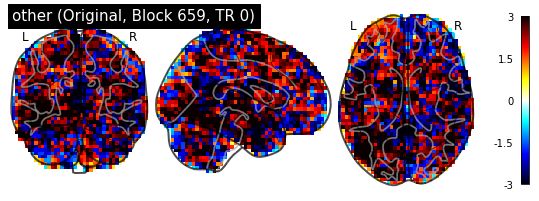

02/04/2020 18:35:37 Reconstruction Error (Frobenius Norm): 1.07051086e+02 out of 5.57870056e+02


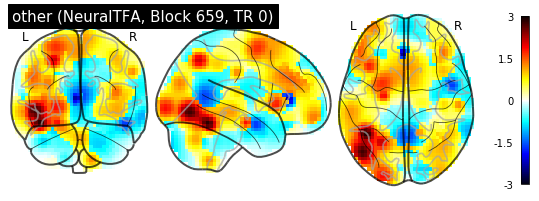

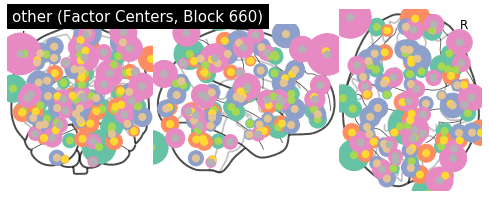

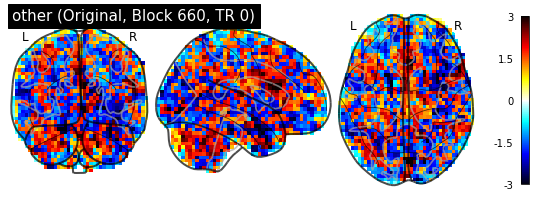

02/04/2020 18:35:40 Reconstruction Error (Frobenius Norm): 1.04154434e+02 out of 3.25104126e+02


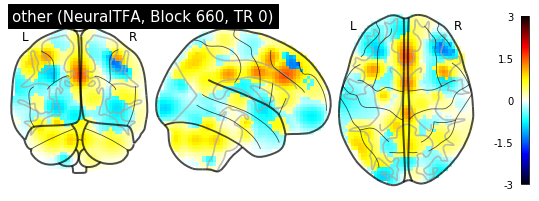

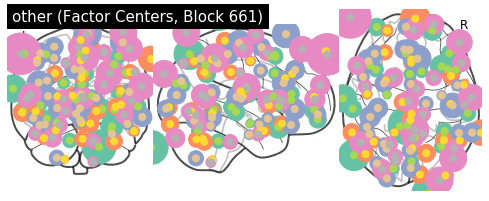

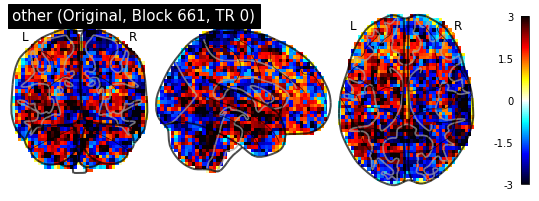

02/04/2020 18:35:44 Reconstruction Error (Frobenius Norm): 1.14413818e+02 out of 5.08898376e+02


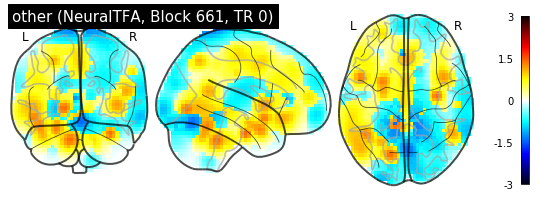

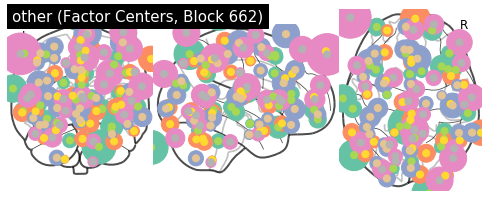

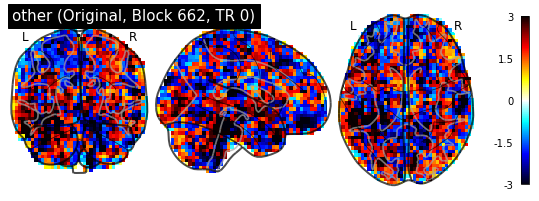

02/04/2020 18:35:47 Reconstruction Error (Frobenius Norm): 1.23483078e+02 out of 3.82005981e+02


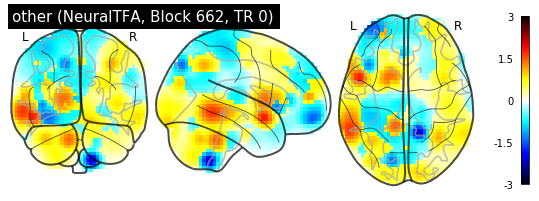

In [17]:
subject_runs = set([(block.subject, block.run) for block in dtfa._blocks])

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in dtfa._blocks if block.subject == subject and block.run == run]
    blocks.sort(key=lambda b: b.start_time)
    for block in blocks:
        index = dtfa._blocks.index(block)
        dtfa.plot_factor_centers(index, labeler=block_task_labeler)
        dtfa.plot_original_brain(index, labeler=block_task_labeler)
        dtfa.plot_reconstruction(index, labeler=block_task_labeler)


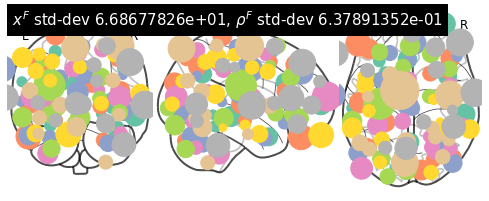

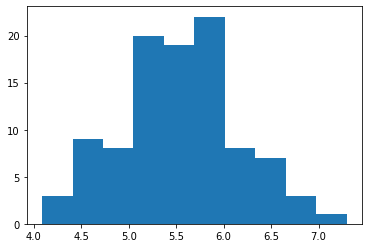

(<nilearn.plotting.displays.OrthoProjector at 0x7fd33c34e990>,
 tensor([[-6.1304e+01, -2.4658e+01,  2.5032e+01],
         [ 3.9104e+01, -5.9120e+01, -2.3126e+01],
         [ 4.3667e+01,  2.3289e+00,  3.8850e+01],
         [ 3.5893e+01,  6.3907e+01,  2.7173e+00],
         [-3.7318e-01, -6.0544e+01,  3.3942e+01],
         [-3.2291e+01,  2.4767e+01,  4.1504e+00],
         [-3.1412e+01, -4.7095e+01, -2.1076e+01],
         [-2.6146e+01,  1.2343e+01,  5.6782e+01],
         [ 5.7785e+01, -3.0936e+01, -1.0989e+01],
         [ 2.2109e+01, -4.9580e+01, -8.9194e+00],
         [-2.6680e+00,  2.6632e+01,  2.4951e+01],
         [-1.6222e+01, -8.7854e+01,  2.1913e+01],
         [ 3.9462e+01,  9.0795e+00, -3.2305e+01],
         [-2.5309e+01, -1.5765e+01, -1.5436e+01],
         [ 4.5298e+01, -7.6733e+01,  5.1027e+01],
         [-4.4837e+01, -6.5876e+01,  4.1306e+01],
         [ 4.2417e+01,  2.7770e+01,  1.5400e+01],
         [ 2.1425e+01,  1.1755e+01, -6.6359e-01],
         [ 2.4624e+01, -7.9097e+01, -

In [18]:
dtfa.visualize_factor_embedding()

In [19]:
dtfa.average_reconstruction_error()

02/04/2020 18:36:18 Average reconstruction error (MSE): 9.65716764e-01
02/04/2020 18:36:18 Average data norm (Euclidean): 1.07097756e+00
02/04/2020 18:36:18 Percent average reconstruction error: 0.504765


(0.965716763911152, 1.0709775612310108, 0.005047647898077307)

In [20]:
dtfa.average_reconstruction_error(weighted=False)

02/04/2020 18:36:45 Average reconstruction error (MSE): 4.19389390e+02 +/- 1.19345362e+02
02/04/2020 18:36:45 Average data norm (Euclidean): 4.67676635e+02 +/- 1.38281225e+02
02/04/2020 18:36:45 Percent average reconstruction error: 90.279755 +/- 6.83640709e+00


(array([397.18804932, 708.28393555, 321.8739624 , ..., 369.76876831,
        630.63299561, 440.09078979]),
 array([397.1880188 , 708.28393555, 321.87399292, ..., 369.76876831,
        737.20703125, 440.09078979]),
 array([1.00000008, 1.        , 0.99999991, ..., 1.        , 0.85543541,
        1.        ]))